In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## !pip3 install kagglehub

In [131]:
train_df=pd.read_csv("Train.csv", low_memory=False, parse_dates=["saledate"])
test_df=pd.read_csv("Test.csv", parse_dates=["saledate"])
valid_df=pd.read_csv("Valid.csv", parse_dates=["saledate"])

In [4]:
train_df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401120,6333336,10500,1840702,21439,149,1.0,2005,NaN,NaN,2011-11-02,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401121,6333337,11000,1830472,21439,149,1.0,2005,NaN,NaN,2011-11-02,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401122,6333338,11500,1887659,21439,149,1.0,2005,NaN,NaN,2011-11-02,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401123,6333341,9000,1903570,21435,149,2.0,2005,NaN,NaN,2011-10-25,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [5]:
test_df

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,NaN,NaN,2012-10-24,80NX3,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12453,6643173,2558332,21434,149,2,2005,NaN,NaN,2012-10-24,28N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12454,6643184,2558342,21437,149,2,1000,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12455,6643186,2558343,21437,149,2,2006,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [6]:
valid_df

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1222837,902859,1376,121,3,1000,0.0,NaN,2012-01-05,375L,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
1,1222839,1048320,36526,121,3,2006,4412.0,Medium,2012-01-05,TX300LC2,...,None or Unspecified,"12' 4""",None or Unspecified,Yes,Double,NaN,NaN,NaN,NaN,NaN
2,1222841,999308,4587,121,3,2000,10127.0,Medium,2012-01-05,270LC,...,None or Unspecified,"12' 4""",None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1222843,1062425,1954,121,3,1000,4682.0,Low,2012-01-05,892DLC,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
4,1222845,1032841,4701,121,3,2002,8150.0,Medium,2012-01-04,544H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11568,6333344,1919201,21435,149,2,2005,NaN,NaN,2012-03-07,30NX,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
11569,6333345,1882122,21436,149,2,2005,NaN,NaN,2012-01-28,30NX2,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
11570,6333347,1944213,21435,149,2,2005,NaN,NaN,2012-01-28,30NX,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
11571,6333348,1794518,21435,149,2,2006,NaN,NaN,2012-03-07,30NX,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   401125 non-null  int64         
 1   SalePrice                 401125 non-null  int64         
 2   MachineID                 401125 non-null  int64         
 3   ModelID                   401125 non-null  int64         
 4   datasource                401125 non-null  int64         
 5   auctioneerID              380989 non-null  float64       
 6   YearMade                  401125 non-null  int64         
 7   MachineHoursCurrentMeter  142765 non-null  float64       
 8   UsageBand                 69639 non-null   object        
 9   saledate                  401125 non-null  datetime64[ns]
 10  fiModelDesc               401125 non-null  object        
 11  fiBaseModel               401125 non-null  object        
 12  fi

In [8]:
train_df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    258360
UsageBand                   331486
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             137191
fiModelSeries               344217
fiModelDescriptor           329206
ProductSize                 210775
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                296764
Enclosure                      325
Forks                       209048
Pad_Type                    321991
Ride_Control                252519
Stick                       321991
Transmission                217895
Turbocharged                321991
Blade_Extension     

In [9]:
train_df["saledate"].dtype

dtype('<M8[ns]')

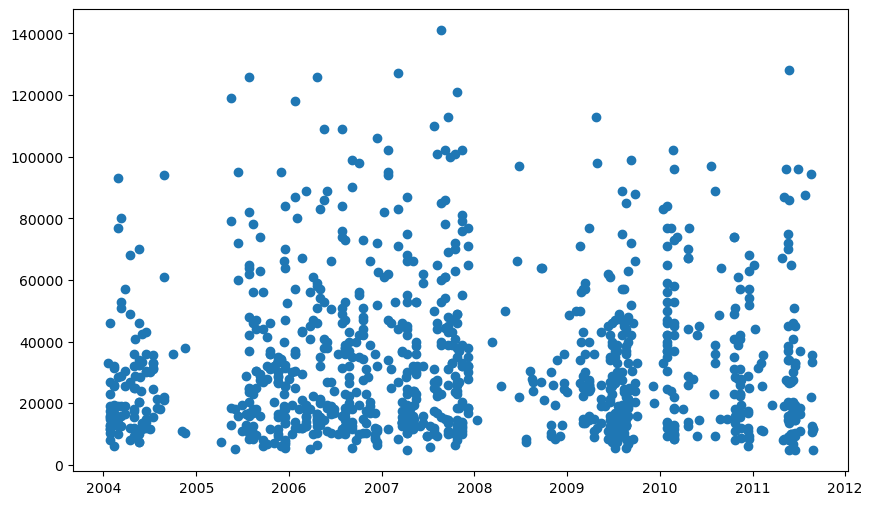

In [10]:
fig, ax=plt.subplots(figsize=(10,6))
ax.scatter(train_df["saledate"][:1000], train_df["SalePrice"][:1000])

<Axes: ylabel='Frequency'>

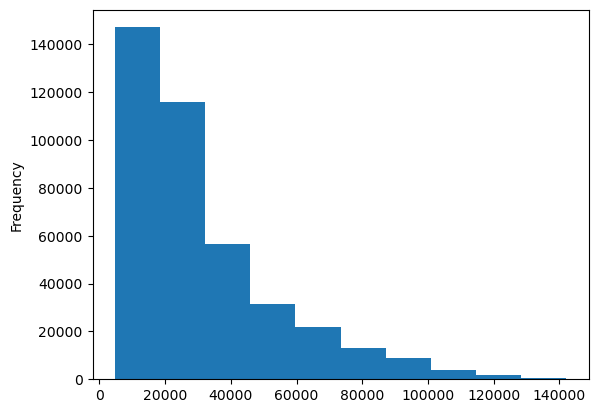

In [11]:
train_df.SalePrice.plot.hist()

In [12]:
train_df.head(20)["saledate"]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

In [13]:
train_df_temp=train_df.copy()

In [14]:
train_df_temp.sort_values(by=["saledate"], inplace=True,ascending=True)

In [15]:
train_df_temp['saledate'].tail(20)

400447   2011-12-30
400455   2011-12-30
394254   2011-12-30
400457   2011-12-30
400459   2011-12-30
396889   2011-12-30
394622   2011-12-30
398374   2011-12-30
400302   2011-12-30
393899   2011-12-30
394193   2011-12-30
393175   2011-12-30
393211   2011-12-30
397995   2011-12-30
400034   2011-12-30
393123   2011-12-30
397987   2011-12-30
392664   2011-12-30
400458   2011-12-30
400217   2011-12-30
Name: saledate, dtype: datetime64[ns]

In [16]:
train_df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401125 entries, 205615 to 400217
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   401125 non-null  int64         
 1   SalePrice                 401125 non-null  int64         
 2   MachineID                 401125 non-null  int64         
 3   ModelID                   401125 non-null  int64         
 4   datasource                401125 non-null  int64         
 5   auctioneerID              380989 non-null  float64       
 6   YearMade                  401125 non-null  int64         
 7   MachineHoursCurrentMeter  142765 non-null  float64       
 8   UsageBand                 69639 non-null   object        
 9   saledate                  401125 non-null  datetime64[ns]
 10  fiModelDesc               401125 non-null  object        
 11  fiBaseModel               401125 non-null  object        
 12  fi

In [17]:
def datetime_to_numeric(entered_dataframe):
    entered_dataframe["df_Year"]=entered_dataframe['saledate'].dt.year
    entered_dataframe["df_Month"]=entered_dataframe['saledate'].dt.month
    entered_dataframe["df_Day"]=entered_dataframe['saledate'].dt.day
    entered_dataframe["df_SalesDayOfWeek"]=entered_dataframe['saledate'].dt.dayofweek
    entered_dataframe["df_SalesDayofYear"]=entered_dataframe['saledate'].dt.dayofyear
    entered_dataframe.drop("saledate", axis=True, inplace=True)
    return entered_dataframe




In [18]:
datetime_to_numeric(train_df_temp)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,df_Year,df_Month,df_Day,df_SalesDayOfWeek,df_SalesDayofYear
205615,1646770,9500,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
92803,1404019,24000,1169900,7110,132,99.0,1986,NaN,NaN,416,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31
98346,1415646,35000,1262088,3357,132,99.0,1975,NaN,NaN,12G,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31
169297,1596358,19000,1433229,8247,132,99.0,1978,NaN,NaN,644,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
274835,1821514,14000,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393123,6260878,13500,1799594,4102,149,2.0,1000,NaN,NaN,D4C,...,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2011,12,30,4,364
397987,6288376,9750,1872596,4875,149,2.0,1000,NaN,NaN,520C,...,NaN,NaN,NaN,Standard,Conventional,2011,12,30,4,364
392664,6258093,14500,1877553,3170,149,2.0,1988,NaN,NaN,580K,...,NaN,NaN,NaN,NaN,NaN,2011,12,30,4,364
400458,6315563,12500,1869637,26456,149,2.0,2010,NaN,NaN,L160,...,NaN,NaN,NaN,Standard,Conventional,2011,12,30,4,364


## Non numeric to numeric

In [19]:
for label, content in train_df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)
    

fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


In [20]:
for label, content in train_df_temp.items():
    if pd.api.types.is_object_dtype(content):
        train_df_temp[label]=content.astype("category").cat.as_ordered()
        
    

In [21]:
train_df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401125 entries, 205615 to 400217
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   401125 non-null  int64   
 1   SalePrice                 401125 non-null  int64   
 2   MachineID                 401125 non-null  int64   
 3   ModelID                   401125 non-null  int64   
 4   datasource                401125 non-null  int64   
 5   auctioneerID              380989 non-null  float64 
 6   YearMade                  401125 non-null  int64   
 7   MachineHoursCurrentMeter  142765 non-null  float64 
 8   UsageBand                 69639 non-null   category
 9   fiModelDesc               401125 non-null  category
 10  fiBaseModel               401125 non-null  category
 11  fiSecondaryDesc           263934 non-null  category
 12  fiModelSeries             56908 non-null   category
 13  fiModelDescriptor         719

In [22]:
train_df_temp['state'].cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [23]:
train_df_temp['state']


205615       Texas
92803      Florida
98346      Florida
169297     Florida
274835     Florida
            ...   
393123    New York
397987    New York
392664    New York
400458    New York
400217    New York
Name: state, Length: 401125, dtype: category
Categories (53, object): ['Alabama' < 'Alaska' < 'Arizona' < 'Arkansas' ... 'Washington DC' < 'West Virginia' < 'Wisconsin' < 'Wyoming']

In [24]:
train_df_temp['state'].cat.codes

205615    43
92803      8
98346      8
169297     8
274835     8
          ..
393123    31
397987    31
392664    31
400458    31
400217    31
Length: 401125, dtype: int8

In [25]:
train_df_temp

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,df_Year,df_Month,df_Day,df_SalesDayOfWeek,df_SalesDayofYear
205615,1646770,9500,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
92803,1404019,24000,1169900,7110,132,99.0,1986,NaN,NaN,416,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31
98346,1415646,35000,1262088,3357,132,99.0,1975,NaN,NaN,12G,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31
169297,1596358,19000,1433229,8247,132,99.0,1978,NaN,NaN,644,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
274835,1821514,14000,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393123,6260878,13500,1799594,4102,149,2.0,1000,NaN,NaN,D4C,...,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2011,12,30,4,364
397987,6288376,9750,1872596,4875,149,2.0,1000,NaN,NaN,520C,...,NaN,NaN,NaN,Standard,Conventional,2011,12,30,4,364
392664,6258093,14500,1877553,3170,149,2.0,1988,NaN,NaN,580K,...,NaN,NaN,NaN,NaN,NaN,2011,12,30,4,364
400458,6315563,12500,1869637,26456,149,2.0,2010,NaN,NaN,L160,...,NaN,NaN,NaN,Standard,Conventional,2011,12,30,4,364


In [26]:
train_df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401125 entries, 205615 to 400217
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   401125 non-null  int64   
 1   SalePrice                 401125 non-null  int64   
 2   MachineID                 401125 non-null  int64   
 3   ModelID                   401125 non-null  int64   
 4   datasource                401125 non-null  int64   
 5   auctioneerID              380989 non-null  float64 
 6   YearMade                  401125 non-null  int64   
 7   MachineHoursCurrentMeter  142765 non-null  float64 
 8   UsageBand                 69639 non-null   category
 9   fiModelDesc               401125 non-null  category
 10  fiBaseModel               401125 non-null  category
 11  fiSecondaryDesc           263934 non-null  category
 12  fiModelSeries             56908 non-null   category
 13  fiModelDescriptor         719

In [27]:
train_df_temp.isna().sum()/len(train_df_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.050199
YearMade                    0.000000
MachineHoursCurrentMeter    0.644089
UsageBand                   0.826391
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.342016
fiModelSeries               0.858129
fiModelDescriptor           0.820707
ProductSize                 0.525460
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.739829
Enclosure                   0.000810
Forks                       0.521154
Pad_Type                    0.802720
Ride_Control                0.629527
Stick                       0.802720
Transmission                0.543210
Turbocharged                0.802720
B

## filling missing data

In [28]:
for label, content in train_df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

        

auctioneerID
MachineHoursCurrentMeter


In [29]:
for label, content in train_df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            train_df_temp[label + "_missing"]=pd.isnull(content)
            train_df_temp[label]=content.fillna(content.median())

In [30]:
train_df_temp

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Travel_Controls,Differential_Type,Steering_Controls,df_Year,df_Month,df_Day,df_SalesDayOfWeek,df_SalesDayofYear,auctioneerID_missing,MachineHoursCurrentMeter_missing
205615,1646770,9500,1126363,8434,132,18.0,1974,0.0,NaN,TD20,...,None or Unspecified,NaN,NaN,1989,1,17,1,17,False,True
92803,1404019,24000,1169900,7110,132,99.0,1986,0.0,NaN,416,...,NaN,NaN,NaN,1989,1,31,1,31,False,True
98346,1415646,35000,1262088,3357,132,99.0,1975,0.0,NaN,12G,...,NaN,NaN,NaN,1989,1,31,1,31,False,True
169297,1596358,19000,1433229,8247,132,99.0,1978,0.0,NaN,644,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True
274835,1821514,14000,1194089,10150,132,99.0,1980,0.0,NaN,A66,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393123,6260878,13500,1799594,4102,149,2.0,1000,0.0,NaN,D4C,...,None or Unspecified,NaN,NaN,2011,12,30,4,364,False,True
397987,6288376,9750,1872596,4875,149,2.0,1000,0.0,NaN,520C,...,NaN,Standard,Conventional,2011,12,30,4,364,False,True
392664,6258093,14500,1877553,3170,149,2.0,1988,0.0,NaN,580K,...,NaN,NaN,NaN,2011,12,30,4,364,False,True
400458,6315563,12500,1869637,26456,149,2.0,2010,0.0,NaN,L160,...,NaN,Standard,Conventional,2011,12,30,4,364,False,True


In [31]:
for label, content in train_df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

## Filling data for categorical labels

In [32]:
train_df_temp.state

205615       Texas
92803      Florida
98346      Florida
169297     Florida
274835     Florida
            ...   
393123    New York
397987    New York
392664    New York
400458    New York
400217    New York
Name: state, Length: 401125, dtype: category
Categories (53, object): ['Alabama' < 'Alaska' < 'Arizona' < 'Arkansas' ... 'Washington DC' < 'West Virginia' < 'Wisconsin' < 'Wyoming']

In [33]:
pd.Categorical(train_df_temp.state).codes  +1 

array([44,  9,  9, ..., 32, 32, 32], dtype=int8)

In [34]:
for label, content in train_df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        train_df_temp[label + "_missing"]=pd.isnull(content)
        train_df_temp[label]=pd.Categorical(content).codes + 1
        

In [35]:
train_df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401125 entries, 205615 to 400217
Columns: 103 entries, SalesID to Steering_Controls_missing
dtypes: bool(46), float64(2), int16(4), int32(5), int64(6), int8(40)
memory usage: 71.2 MB


In [36]:
train_df_temp.isna().sum()

SalesID                      0
SalePrice                    0
MachineID                    0
ModelID                      0
datasource                   0
                            ..
Backhoe_Mounting_missing     0
Blade_Type_missing           0
Travel_Controls_missing      0
Differential_Type_missing    0
Steering_Controls_missing    0
Length: 103, dtype: int64

## Model definition and training

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
train_df_temp.shape

(401125, 103)

In [39]:
model=RandomForestRegressor(n_jobs=-1, random_state=100)


In [40]:
%%time 
model.fit(train_df_temp.drop("SalePrice", axis=True), train_df_temp["SalePrice"])

CPU times: total: 14min 37s
Wall time: 3min 59s


RandomForestRegressor(n_jobs=-1, random_state=100)

In [41]:
model.score(train_df_temp.drop("SalePrice", axis=True), train_df_temp["SalePrice"])

0.9874995780116883

In [42]:
test_df

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,NaN,NaN,2012-10-24,80NX3,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12453,6643173,2558332,21434,149,2,2005,NaN,NaN,2012-10-24,28N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12454,6643184,2558342,21437,149,2,1000,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12455,6643186,2558343,21437,149,2,2006,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [43]:
df_valid=train_df_temp[train_df_temp.df_Year ==2011]
df_train=train_df_temp[train_df_temp.df_Year !=2011]

In [44]:
len(df_valid), len(df_train)

(35197, 365928)

In [45]:
x_train=df_train.drop("SalePrice", axis=True)
y_train=df_train["SalePrice"]

In [46]:
x_train.shape, y_train.shape

((365928, 102), (365928,))

In [47]:
x_valid=df_valid.drop("SalePrice", axis=True)
y_valid=df_valid["SalePrice"]

In [48]:
x_valid.shape, y_valid.shape

((35197, 102), (35197,))

In [49]:
model_1=RandomForestRegressor(n_estimators=100,n_jobs=-1, max_samples= 10000)

In [50]:
%%time
model_1.fit(x_train[:10000],y_train[:10000])

CPU times: total: 13.3 s
Wall time: 3.64 s


RandomForestRegressor(max_samples=10000, n_jobs=-1)

In [51]:
%%time
model_1.fit(x_train,y_train)

CPU times: total: 30.4 s
Wall time: 8.49 s


RandomForestRegressor(max_samples=10000, n_jobs=-1)

## Model Evaluation

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error, mean_squared_log_error, r2_score

In [53]:
def scores_calculator (Entered_Model):
    train_preds=Entered_Model.predict(x_train) 
    valid_preds=Entered_Model.predict(x_valid)
    scores={
            "Training_MAE": mean_absolute_error(y_train, train_preds),
            "Valid_MAE": mean_absolute_error(y_valid, valid_preds),
            "Training_MSE": mean_squared_error(y_train, train_preds),
            "Valid_MSE": mean_squared_error(y_valid, valid_preds),
            "Training_MAPE": mean_absolute_percentage_error(y_train, train_preds),
            "Valid_MAPE": mean_absolute_percentage_error(y_valid, valid_preds),
            "Training_MSLE": mean_squared_log_error(y_train, train_preds),
            "Valid_MSLE": mean_squared_log_error(y_valid, valid_preds),
            "Training_RMSLE":np.sqrt( mean_squared_log_error(y_train, train_preds)),
            "Valid_RMSLE": np.sqrt(mean_squared_log_error(y_valid, valid_preds)),
            "Training_R2": r2_score(y_train, train_preds),
            "Valid_R2": r2_score(y_valid, valid_preds),
            
    }
    return scores

    

In [54]:
scores_calculator(model_1)

{'Training_MAE': 5471.670557896636,
 'Valid_MAE': 6867.314275932607,
 'Training_MSE': 71992471.99885258,
 'Valid_MSE': 112949839.11711484,
 'Training_MAPE': 0.20760903202741549,
 'Valid_MAPE': 0.23161766460295222,
 'Training_MSLE': 0.06545053017021775,
 'Valid_MSLE': 0.08103862725215362,
 'Training_RMSLE': 0.2558330122760113,
 'Valid_RMSLE': 0.28467284249143543,
 'Training_R2': 0.8619346611319672,
 'Valid_R2': 0.8173530419256781}

## Hyperparameter Tuning with RandomizedSearchCV

In [55]:
from sklearn.model_selection import RandomizedSearchCV

In [58]:
rf_grid={
            "n_estimators":np.arange(10,100,10),
            "max_depth":[None, 4,6,8,9],
            "min_samples_split":np.arange(2,20,2),
            "max_features":['sqrt', 'log2', None] , 
            "min_samples_leaf":np.arange(1,15,2),
            "max_samples":[10000]
}

In [60]:
%%time
rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1),
                           param_distributions=rf_grid,
                            n_iter=100,
                            cv=5,
                            verbose=True
                           )

rs_model.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: total: 40min 53s
Wall time: 16min 19s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_iter=100,
                   param_distributions={'max_depth': [None, 4, 6, 8, 9],
                                        'max_features': ['sqrt', 'log2', None],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [61]:
rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 16,
 'min_samples_leaf': 5,
 'max_samples': 10000,
 'max_features': None,
 'max_depth': None}

In [62]:
rs_model.best_score_

0.7239387645791563

## Finalize the competition 

In [64]:
final_Model=RandomForestRegressor(n_estimators=90,min_samples_split=16,min_samples_leaf=5,max_features=None,max_depth=None)

In [65]:
%%time
final_Model.fit(x_train, y_train)

CPU times: total: 10min 2s
Wall time: 11min 33s


RandomForestRegressor(max_features=None, min_samples_leaf=5,
                      min_samples_split=16, n_estimators=90)

In [66]:
scores_calculator(final_Model)

{'Training_MAE': 3250.075443762932,
 'Valid_MAE': 5996.801379843019,
 'Training_MSE': 28047043.883403234,
 'Valid_MSE': 90333879.48919185,
 'Training_MAPE': 0.11954479457451349,
 'Valid_MAPE': 0.18767475049516272,
 'Training_MSLE': 0.026062809781836963,
 'Valid_MSLE': 0.06149842340446414,
 'Training_RMSLE': 0.16143980234699545,
 'Valid_RMSLE': 0.24798875660897238,
 'Training_R2': 0.9462120898130797,
 'Valid_R2': 0.853924463914945}

In [68]:
test_preds=final_Model.predict(test_df)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- saledate
Feature names seen at fit time, yet now missing:
- Backhoe_Mounting_missing
- Blade_Extension_missing
- Blade_Type_missing
- Blade_Width_missing
- Coupler_System_missing
- ...


In [69]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [70]:
test_df

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,NaN,NaN,2012-10-24,80NX3,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12453,6643173,2558332,21434,149,2,2005,NaN,NaN,2012-10-24,28N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12454,6643184,2558342,21437,149,2,1000,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12455,6643186,2558343,21437,149,2,2006,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [103]:
def preprocesing_df(df):
    df["df_Year"]=df['saledate'].dt.year
    df["df_Month"]=df['saledate'].dt.month
    df["df_Day"]=df['saledate'].dt.day
    df["df_SalesDayOfWeek"]=df['saledate'].dt.dayofweek
    df["df_SalesDayofYear"]=df['saledate'].dt.dayofyear
    df.drop("saledate", axis=True, inplace=True)

    ## Filling null for numeric data
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label + "_missing"]=pd.isnull(content)
                df[label]=content.fillna(content.median())
                
            ## Filling nulls for nun numeric and changing them to numeric
        if not pd.api.types.is_numeric_dtype(content):
            df[label + "_missing"]=pd.isnull(content)
            df[label]=pd.Categorical(content).codes + 1



    
    

In [86]:
train_df_temp

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_missing,Stick_Length_missing,Thumb_missing,Pattern_Changer_missing,Grouser_Type_missing,Backhoe_Mounting_missing,Blade_Type_missing,Travel_Controls_missing,Differential_Type_missing,Steering_Controls_missing
205615,1646770,9500,1126363,8434,132,18.0,1974,0.0,0,4537,...,True,True,True,True,True,False,False,False,True,True
92803,1404019,24000,1169900,7110,132,99.0,1986,0.0,0,735,...,True,True,True,True,True,True,True,True,True,True
98346,1415646,35000,1262088,3357,132,99.0,1975,0.0,0,82,...,True,True,True,True,True,True,True,True,True,True
169297,1596358,19000,1433229,8247,132,99.0,1978,0.0,0,1158,...,True,True,True,True,True,True,True,True,False,False
274835,1821514,14000,1194089,10150,132,99.0,1980,0.0,0,1800,...,True,True,True,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393123,6260878,13500,1799594,4102,149,2.0,1000,0.0,0,2137,...,True,True,True,True,True,False,False,False,True,True
397987,6288376,9750,1872596,4875,149,2.0,1000,0.0,0,945,...,True,True,True,True,True,True,True,True,False,False
392664,6258093,14500,1877553,3170,149,2.0,1988,0.0,0,1057,...,True,True,True,True,True,True,True,True,True,True
400458,6315563,12500,1869637,26456,149,2.0,2010,0.0,0,3267,...,True,True,True,True,True,True,True,True,False,False


In [87]:
test_df

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,df_Year,df_Month,df_Day,df_SalesDayOfWeek,df_SalesDayofYear
0,1227829,1006309,3168,121,3,1999,3688.0,Low,580G,580,...,NaN,NaN,NaN,NaN,NaN,2012,5,3,3,124
1,1227844,1022817,7271,121,3,1000,28555.0,High,936,936,...,NaN,NaN,NaN,Standard,Conventional,2012,5,10,3,131
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,EC210BLC,EC210,...,NaN,NaN,NaN,NaN,NaN,2012,5,10,3,131
3,1227848,56204,1269,121,3,2006,8940.0,High,330CL,330,...,NaN,NaN,NaN,NaN,NaN,2012,5,10,3,131
4,1227863,1053887,22312,121,3,2005,2286.0,Low,650K,650,...,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2012,5,10,3,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,NaN,NaN,80NX3,80,...,NaN,NaN,NaN,NaN,NaN,2012,10,24,2,298
12453,6643173,2558332,21434,149,2,2005,NaN,NaN,28N,28,...,NaN,NaN,NaN,NaN,NaN,2012,10,24,2,298
12454,6643184,2558342,21437,149,2,1000,NaN,NaN,35N,35,...,NaN,NaN,NaN,NaN,NaN,2012,10,24,2,298
12455,6643186,2558343,21437,149,2,2006,NaN,NaN,35N,35,...,NaN,NaN,NaN,NaN,NaN,2012,10,24,2,298


In [104]:
preprocesing_df(test_df)

In [105]:
test_df

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_missing,Stick_Length_missing,Thumb_missing,Pattern_Changer_missing,Grouser_Type_missing,Backhoe_Mounting_missing,Blade_Type_missing,Travel_Controls_missing,Differential_Type_missing,Steering_Controls_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,713,235,...,False,False,False,False,False,True,True,True,True,True
12453,6643173,2558332,21434,149,2,2005,3525.0,0,186,80,...,False,False,False,False,False,True,True,True,True,True
12454,6643184,2558342,21437,149,2,1000,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True
12455,6643186,2558343,21437,149,2,2006,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True


In [106]:
test_df.isna().sum()

SalesID                      0
MachineID                    0
ModelID                      0
datasource                   0
auctioneerID                 0
                            ..
Backhoe_Mounting_missing     0
Blade_Type_missing           0
Travel_Controls_missing      0
Differential_Type_missing    0
Steering_Controls_missing    0
Length: 101, dtype: int64

In [107]:
x_train

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_missing,Stick_Length_missing,Thumb_missing,Pattern_Changer_missing,Grouser_Type_missing,Backhoe_Mounting_missing,Blade_Type_missing,Travel_Controls_missing,Differential_Type_missing,Steering_Controls_missing
205615,1646770,1126363,8434,132,18.0,1974,0.0,0,4537,1735,...,True,True,True,True,True,False,False,False,True,True
92803,1404019,1169900,7110,132,99.0,1986,0.0,0,735,243,...,True,True,True,True,True,True,True,True,True,True
98346,1415646,1262088,3357,132,99.0,1975,0.0,0,82,19,...,True,True,True,True,True,True,True,True,True,True
169297,1596358,1433229,8247,132,99.0,1978,0.0,0,1158,349,...,True,True,True,True,True,True,True,True,False,False
274835,1821514,1194089,10150,132,99.0,1980,0.0,0,1800,557,...,True,True,True,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37748,1275828,1533633,3112,132,16.0,1999,0.0,0,188,64,...,True,True,True,True,True,True,True,True,True,True
360802,2496021,1429283,3112,149,16.0,2001,2361.0,3,188,64,...,True,True,True,True,True,True,True,True,True,True
360254,2482911,1923723,6270,149,16.0,1000,0.0,0,4161,1490,...,True,True,True,True,True,True,True,True,True,True
373739,2698005,1791379,22666,149,16.0,1997,0.0,0,2183,702,...,True,True,True,True,True,False,False,False,True,True


In [109]:
set(x_train.columns)-set(test_df.columns)

{'auctioneerID_missing'}

In [115]:
test_df["auctioneerID_missing"]=False

In [116]:
set(x_train.columns)-set(test_df.columns)

set()

In [117]:
test_df

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_missing,Thumb_missing,Pattern_Changer_missing,Grouser_Type_missing,Backhoe_Mounting_missing,Blade_Type_missing,Travel_Controls_missing,Differential_Type_missing,Steering_Controls_missing,auctioneerID_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,713,235,...,False,False,False,False,True,True,True,True,True,False
12453,6643173,2558332,21434,149,2,2005,3525.0,0,186,80,...,False,False,False,False,True,True,True,True,True,False
12454,6643184,2558342,21437,149,2,1000,3525.0,0,325,123,...,False,False,False,False,True,True,True,True,True,False
12455,6643186,2558343,21437,149,2,2006,3525.0,0,325,123,...,False,False,False,False,True,True,True,True,True,False


In [119]:
test_df=test_df[x_train.columns]

In [120]:
test_df

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_missing,Stick_Length_missing,Thumb_missing,Pattern_Changer_missing,Grouser_Type_missing,Backhoe_Mounting_missing,Blade_Type_missing,Travel_Controls_missing,Differential_Type_missing,Steering_Controls_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,713,235,...,False,False,False,False,False,True,True,True,True,True
12453,6643173,2558332,21434,149,2,2005,3525.0,0,186,80,...,False,False,False,False,False,True,True,True,True,True
12454,6643184,2558342,21437,149,2,1000,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True
12455,6643186,2558343,21437,149,2,2006,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True


In [122]:
test_preds=final_Model.predict(test_df)

In [128]:
test_preds

array([16412.21080167, 17783.99974808, 43602.98419509, ...,
       12947.60313437, 17501.28245977, 24558.65549937])

In [129]:
from sklearn.metrics import root_mean_squared_log_error

In [133]:
##root_mean_squared_log_error(test_df, test_preds)

In [134]:
final_csv=pd.DataFrame()
final_csv["SalesID"]=test_df["SalesID"]
final_csv["SalePrice"]=test_preds


In [135]:
final_csv

,SalesID,SalePrice
0,1227829,16412.210802
1,1227844,17783.999748
2,1227847,43602.984195
3,1227848,80076.917765
4,1227863,40295.780933
...,...,...
12452,6643171,47173.006672
12453,6643173,11382.201036
12454,6643184,12947.603134
12455,6643186,17501.282460


In [136]:
final_csv.to_csv("final_csv_file.csv")